**Author** : V.Joan Aléonard<br>
**Last update** :  25 March 2021

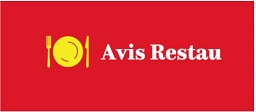

# <font color=red><center>**AVIS RESTAU**</center></font>

**Avis Restau** is a website which connects clients and restaurants:
- The clients can publish reviews and photos of the restaurants;
- The restaurants can leverage from customer's feedbacks for improvement.

**As Data scientist for Avis Restau**, our mission is summarized as follows:

| **Task** | **Objective** | **Available notebook** |
| :-- | :-- | :-- |
| Analyze customers' reviews | **Detect customer's insatisfaction topics** | Notebook N°1 |
| Treat photo posted by customers | **Classify automatically customer's photos** | Notebook N°2 |
| Collect new data throuhg API | **Enrich our database** | **<font color=green>Notebook N°3</font>** |

This notebook is dedicated to 3rd task : collect new data through Yelp API to enrich our database.

# <font color=red><center>**NOTEBOOK 3<br>DATA COLLECTION<br>THROUGH YELP API**</center></font>

# <font color=salmon>**OBJECTIVES**</font>

This notebook intends to gather a sample of **200 Paris restaurants details from Developers API (*Application Programming Interface*) provided by Yelp**:
- by identifying the useful information;
- by saving the result in a CSV (Comma-Separated Values) file.

**Yelp API** documentation is available [here](https://www.yelp.com/developers/documentation/v3/get_started).

# <font color=salmon>**LIBRAIRIES**</font>

To gather the needed information, we will need to:
- request the data from API with the request.get method;
- handle JSON data with the json package;
- transform, analyze and save the data with pandas package.

In [1]:
# Libraries and Configurations
import pandas as pd
import requests
import json
from urllib.parse import urlparse

pd.set_option('display.max_colwidth', 200)

# <font color=salmon>**API CREDENTIALS**</font>

Yelp **API credentials** are needed to authenticate API calls, because the API uses **private key authentication** to reach all available endpoints, which are necessary to return the requested details.

***Business Search*** with **'https://api.yelp.com/v3/businesses/search'** endpoint will give us a tracking of restaurants, especially their IDs, which enables us to reach the related ***reviews*** with **'https://api.yelp.com/v3/businesses/{id}/reviews'** endpoint (3 excerpts for a business).

In [2]:
# Import API key
with open('credentials.json') as creds:
    credentials = json.load(creds)

api_key = credentials['api_key']

# Define Headers and Endpoint's urls
headers = {'Authorization': 'Bearer %s' % api_key,
           'Content-Type':'application/json'}
url = 'https://api.yelp.com/v3/businesses'

# <font color=salmon>**REQUEST AGAINST THE API**</font>

## <font color=green>**Get Paris restaurants IDs**</font>

In [3]:
# Create a list to store result
resto_ids = []

# Set a dictionary of parameters
endpoint_1 = url + '/search'
params = {'term':'restaurants',
          'location':'Paris, France',
          'offset':0,
          'limit':50}

# Set variables
current_offset=0
current_limit=50 
total_response = 200

while current_offset <= total_response:
    # Provide evidence the API is working
    print(current_offset)
    
    params['offset'] = current_offset
    response = requests.get(url=endpoint_1,
                            headers=headers,
                            params=params)
    
    # Ensure we have unique business ID
    # .json decode the format to Python object (dictionary)
    if 'businesses' in response.json():
        # Save IDs by adding with previous
        resto_ids += [business['id'] for business in response.json()['businesses']]
    
    current_offset += current_limit

0
50
100
150
200


## <font color=green>**Retrieve related reviews**</font>

In [4]:
#Create the dataframe which will receive the data
data = pd.DataFrame(columns=['review_id',
                             'business_id',
                             'rating',
                             'text'])
#Retrieve the related reviews
i=0
for id in resto_ids:
    endpoint_2 = url + '/' + str(id) + "/reviews"
    response = requests.get(url=endpoint_2,
                            headers=headers)
    
    for review in response.json()['reviews']:
        data.loc[i]=[review['id'],
                     id,
                     review['rating'],
                     review['text']]
        i+=1

## <font color=green>**Check DataFrame info**</font>

In [5]:
# Display shape and 5 first rows
print(data.shape)
data.head()

(732, 4)


,review_id,business_id,rating,text
0,0GvOPvExrJQ8wqv6rDTPFQ,-0iLH7iQNYtoURciDpJf6w,5,The epitome of a classic French bistro in the middle of Paris. We were fortunate to find a table available for a late lunch just by walking-in. Based on...
1,4f5MWUZEuw4tpTd5OouLRQ,-0iLH7iQNYtoURciDpJf6w,5,"I've been meaning to review this place forever... The food here is just fantastic, everything is delicious. Don't miss out on the ravioli, the cassoulet and..."
2,_lV2X33T7KueX0_kmEXilA,-0iLH7iQNYtoURciDpJf6w,5,"This restaurant is simply amazing!!! If you are debating on trying this restaurant, just do it !!! You will not be disappointed. The whole staff from..."
3,ZmoR2TgBN7L4FdK__vFlJA,IU9_wVOGBKjfqTTpAXpKcQ,5,They are known for their gratin and they sure make it homely well! It went hand in hand with the choice of meat and wine! \n\nI adored the smoked salmon and...
4,e-NjhR6Z4TgsIqZveCUjTg,IU9_wVOGBKjfqTTpAXpKcQ,5,"When I find myself in Paris, I am always a few things:\n\n*happy (j'adore cette ville) \n*grateful (self explanatory)\n*thirsty (see you in a few Chez Georges /..."


## <font color=green>**Save as CSV file**</font>

In [6]:
# Save to CSV file
data.to_csv('P6_01_CSV_YelpApiData.csv',
            index=False,
            encoding='utf-8')